# Ordinary Differential equation
Here, we aim to solve the ordinary differential equation (ODE) shown below using neural networks. Before tackling the problem, it is crucial to understand the differential equation along with its boundary conditions, as they form the foundation for formulating the loss function.


del_u/del_x = -u

u = 1 at x=0

In [2]:
import torch
from torch import nn

u = NN(x) --> Here NN(x) will be the neural network function which we will find by minimizing the below loss functions. The loss functions are constructed to ensure that the neural network satisfies the given physical constraints.

L = u-NN(x) (Loss function from differential equation)

L = del_u/del_x + u (loss fucntion from boundary_condition)

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## In the below cell, we are defining the architecture of a neural network that will serve as a model for solving the given differential equation by approximating the solution while satisfying the physical laws and boundary conditions.

In [4]:
class ODEModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=1, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=1)
    self.tanh = nn.Tanh()
  def forward(self,x):
    return self.layer2(self.tanh(self.layer1(x)))

In [5]:
model=ODEModel()
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.5193],
                      [ 0.3075],
                      [ 0.6027],
                      [ 0.0686],
                      [-0.9059],
                      [ 0.9930],
                      [ 0.4594],
                      [-0.4714],
                      [ 0.0174],
                      [ 0.1133]])),
             ('layer1.bias',
              tensor([ 0.0223,  0.9165, -0.4237,  0.3583, -0.9975, -0.4441, -0.3587,  0.7823,
                      -0.2151, -0.6541])),
             ('layer2.weight',
              tensor([[-0.0498,  0.1717, -0.1484, -0.0169,  0.3159,  0.0833,  0.1426,  0.1477,
                        0.1505, -0.1724]])),
             ('layer2.bias', tensor([0.1766]))])

In [6]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.5193],
         [ 0.3075],
         [ 0.6027],
         [ 0.0686],
         [-0.9059],
         [ 0.9930],
         [ 0.4594],
         [-0.4714],
         [ 0.0174],
         [ 0.1133]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0223,  0.9165, -0.4237,  0.3583, -0.9975, -0.4441, -0.3587,  0.7823,
         -0.2151, -0.6541], requires_grad=True),
 Parameter containing:
 tensor([[-0.0498,  0.1717, -0.1484, -0.0169,  0.3159,  0.0833,  0.1426,  0.1477,
           0.1505, -0.1724]], requires_grad=True),
 Parameter containing:
 tensor([0.1766], requires_grad=True)]

In [7]:
def loss_function(x,model):
  # Predict u(x) using the model
  u = model(x)

  # Compute the derivative of u with resepect to x
  u_x = torch.autograd.grad(outputs=u,
                            inputs=x,
                            grad_outputs = torch.ones_like(u),
                            create_graph=True)[0]

  # ODE residual (should be zero ideally)
  ode_residual = u_x + u

  # Loss for the ode
  ode_loss = torch.mean(ode_residual**2)

  # Loss for initial condition
  initial_condition_loss = (model(torch.tensor([[0.0]], requires_grad=True))-1.0)**2

  return ode_loss + initial_condition_loss

In [8]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [9]:
x_train = torch.linspace(0,2,100).reshape(-1,1)
x_train.requires_grad = True

In [10]:
# training loop

epochs = 1000

for epoch in range(epochs):

  optimizer.zero_grad()

  loss = loss_function(x_train, model)

  loss.backward()

  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch: {epoch}, Loss: {loss.item()}')
  x_test = torch.linspace(0,2,100).reshape(-1,1)
  with torch.inference_mode():
    u_pred = model(x_test)



Epoch: 0, Loss: 0.667424738407135
Epoch: 100, Loss: 0.04067021608352661
Epoch: 200, Loss: 0.027264665812253952
Epoch: 300, Loss: 0.018045693635940552
Epoch: 400, Loss: 0.012211897410452366
Epoch: 500, Loss: 0.00870769564062357
Epoch: 600, Loss: 0.006636942271143198
Epoch: 700, Loss: 0.005387729033827782
Epoch: 800, Loss: 0.004591311793774366
Epoch: 900, Loss: 0.004041953012347221


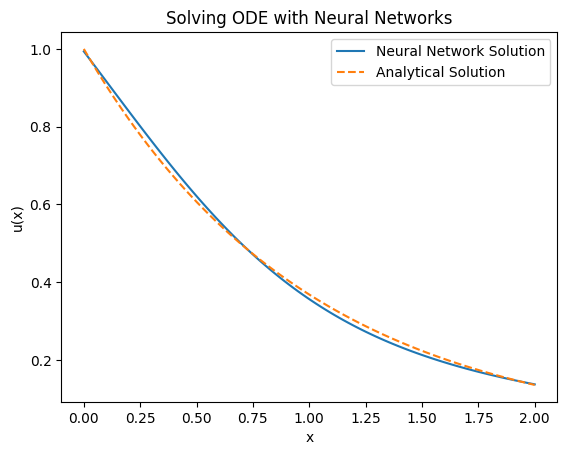

In [11]:
import matplotlib.pyplot as plt
plt.plot(x_test.numpy(), u_pred.numpy(), label='Neural Network Solution')
plt.plot(x_test.numpy(), torch.exp(-x_test).numpy(), label='Analytical Solution', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solving ODE with Neural Networks')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
print("The mean squared error between PINNS and Analytical solution is",mean_squared_error(torch.exp(-x_test).numpy(), u_pred.numpy()))

The mean squared error between PINNS and Analytical solution is 0.00014604509


# The mean squared error between the **Physics Informed Neural Networks** and the **Analytical Solution** is very close to 0. This shows that the model is a close approximation of the actual solution.

# In our other notebooks we will try to solve other popular differential euqations.


---------------------------------------------------------------